In [107]:
#Este analisis verifica si la cercanía la linea A de subte afecta el precio.

import pandas as pd
import numpy as np
#import shapely
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Cargamos los datos que ya tenemos procesados

#Datos procesados
filteredData = pd.read_csv('dataFiltrada/dataV2.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
data = filteredData

#Elimino NAs
data.dropna(inplace=True)


#Me quedo con las propiedades que atraviesan las distintas lineas
propRecorridoA = data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Flores')|
                        data.barrio.str.contains('Caballito')]

propRecorridoB= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Villa Crespo')|
                        data.barrio.str.contains('Chacarita')]

propRecorridoC= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Monserrat')|
                        data.barrio.str.contains('Retiro')|
                        data.barrio.str.contains('Constitucion')]

propRecorridoD= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')|
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Recoleta')|
                        data.barrio.str.contains('Palermo')|
                        data.barrio.str.contains('Belgrano')|
                        data.barrio.str.contains('Barrio Norte')]

propRecorridoE= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('Constitucion')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Parque Chacabuco')|
                        data.barrio.str.contains('Parque Avellaneda')]

propRecorridoH= data[data.barrio.str.contains('Parque Patricios') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Recoleta')]


In [108]:
#Cargamos el csv de los subtes
df = pd.read_csv('dataFiltrada/subtes.csv', encoding = '"ISO-8859-1"')

#Discriminamos por linea
estacionesA = df[df['LINEA'] == 'A']
estacionesB = df[df['LINEA'] == 'B']
estacionesC = df[df['LINEA'] == 'C']
estacionesD = df[df['LINEA'] == 'D']
estacionesE = df[df['LINEA'] == 'E']
estacionesH = df[df['LINEA'] == 'H']


In [109]:
#Peru
peru_lon = estacionesA.loc[estacionesA.index[0],'X']
peru_lat = estacionesA.loc[estacionesA.index[0],'Y']
propRecorridoA['peru_lon'] = peru_lon
propRecorridoA['peru_lat'] = peru_lat

#Piedras
piedras_lon = estacionesA.loc[estacionesA.index[1],'X']
piedras_lat = estacionesA.loc[estacionesA.index[1],'Y']
propRecorridoA['piedras_lon'] = piedras_lon
propRecorridoA['piedras_lat'] = piedras_lat
#Lima
lima_lon = estacionesA.loc[estacionesA.index[2],'X']
lima_lat = estacionesA.loc[estacionesA.index[2],'Y']
propRecorridoA['lima_lon'] = lima_lon
propRecorridoA['lima_lat'] = lima_lat
#Saenz
saenz_lon = estacionesA.loc[estacionesA.index[3],'X']
saenz_lat = estacionesA.loc[estacionesA.index[3],'Y']
propRecorridoA['saenz_lon'] = saenz_lon
propRecorridoA['saenz_lat'] = saenz_lat
#Congreso
congreso_lon = estacionesA.loc[estacionesA.index[4],'X']
congreso_lat = estacionesA.loc[estacionesA.index[4],'Y']
propRecorridoA['congreso_lon'] = congreso_lon
propRecorridoA['congreso_lat'] = congreso_lat
#Pasco
pasco_lon = estacionesA.loc[estacionesA.index[5],'X']
pasco_lat = estacionesA.loc[estacionesA.index[5],'Y']
propRecorridoA['pasco_lon'] = pasco_lon
propRecorridoA['pasco_lat'] = pasco_lat
#Alberti
alberti_lon = estacionesA.loc[estacionesA.index[6],'X']
alberti_lat = estacionesA.loc[estacionesA.index[6],'Y']
propRecorridoA['alberti_lon'] = alberti_lon
propRecorridoA['alberti_lat'] = alberti_lat
#Miserere
miserere_lon = estacionesA.loc[estacionesA.index[7],'X']
miserere_lat = estacionesA.loc[estacionesA.index[7],'Y']
propRecorridoA['miserere_lon'] = miserere_lon
propRecorridoA['miserere_lat'] = miserere_lat
#Loria
loria_lon = estacionesA.loc[estacionesA.index[8],'X']
loria_lat = estacionesA.loc[estacionesA.index[8],'Y']
propRecorridoA['loria_lon'] = loria_lon
propRecorridoA['loria_lat'] = loria_lat
#Castro Barros
castroBarros_lon = estacionesA.loc[estacionesA.index[9],'X']
castroBarros_lat = estacionesA.loc[estacionesA.index[9],'Y']
propRecorridoA['castroBarros_lon'] = castroBarros_lon
propRecorridoA['castroBarros_lat'] = castroBarros_lat
#Rio de Janeiro
janeiro_lon = estacionesA.loc[estacionesA.index[10],'X']
janeiro_lat = estacionesA.loc[estacionesA.index[10],'Y']
propRecorridoA['janeiro_lon'] = janeiro_lon
propRecorridoA['janeiro_lat'] = janeiro_lat
#Acoyte
acoyte_lon = estacionesA.loc[estacionesA.index[11],'X']
acoyte_lat = estacionesA.loc[estacionesA.index[11],'Y']
propRecorridoA['acoyte_lon'] = acoyte_lon
propRecorridoA['acoyte_lat'] = acoyte_lat
#Primera Junta
primeraJunta_lon = estacionesA.loc[estacionesA.index[12],'X']
primeraJunta_lat = estacionesA.loc[estacionesA.index[12],'Y']
propRecorridoA['primeraJunta_lon'] = primeraJunta_lon
propRecorridoA['primeraJunta_lat'] = primeraJunta_lat
#Plaza de mayo
plazaMayo_lon = estacionesA.loc[estacionesA.index[13],'X']
plazaMayo_lat = estacionesA.loc[estacionesA.index[13],'Y']
propRecorridoA['plazaMayo_lon'] = plazaMayo_lon
propRecorridoA['plazaMayo_lat'] = plazaMayo_lat
#Carabobo
carabobo_lon = estacionesA.loc[estacionesA.index[14],'X']
carabobo_lat = estacionesA.loc[estacionesA.index[14],'Y']
propRecorridoA['carabobo_lon'] = carabobo_lon
propRecorridoA['carabobo_lat'] = carabobo_lat
#Puan
puan_lon = estacionesA.loc[estacionesA.index[15],'X']
puan_lat = estacionesA.loc[estacionesA.index[15],'Y']
propRecorridoA['puan_lon'] = puan_lon
propRecorridoA['puan_lat'] = puan_lat
#San Pedrito
sanPedrito_lon = estacionesA.loc[estacionesA.index[16],'X']
sanPedrito_lat = estacionesA.loc[estacionesA.index[16],'Y']
propRecorridoA['sanPedrito_lon'] = sanPedrito_lon
propRecorridoA['sanPedrito_lat'] = sanPedrito_lat
#Flores
flores_lon = estacionesA.loc[estacionesA.index[17],'X']
flores_lat = estacionesA.loc[estacionesA.index[17],'Y']
propRecorridoA['flores_lon'] = flores_lon
propRecorridoA['flores_lat'] = flores_lat


propRecorridoA.info()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 3 to 50126
Data columns (total 54 columns):
Unnamed: 0          11008 non-null int64
Unnamed: 0.1        11008 non-null int64
start_date          11008 non-null object
end_date            11008 non-null object
lat                 11008 non-null float64
lon                 11008 non-null float64
barrio              11008 non-null object
rooms               11008 non-null float64
bedrooms            11008 non-null float64
bathrooms           11008 non-null float64
surface_total       11008 non-null float64
surface_covered     11008 non-null float64
price               11008 non-null float64
title               11008 non-null object
description         11008 non-null object
property_type       11008 non-null object
operation_type      11008 non-null object
dist_centro         11008 non-null float64
peru_lon            11008 non-null float64
peru_lat            11008 non-null float64
piedras_lon         11008 non-null float64

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
#Calculamos la distancia de cada propiedad a cada estacion de subte de la linea A
#Peru
propRecorridoA['dist_peru'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['peru_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['peru_lat'])
#Piedras
propRecorridoA['dist_piedras'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['piedras_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['piedras_lat'])
#Lima
propRecorridoA['dist_lima'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['lima_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['lima_lat'])
#Saenz
propRecorridoA['dist_saenz'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['saenz_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['saenz_lat'])
#Congreso
propRecorridoA['dist_congreso'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['congreso_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['congreso_lat'])
#Pasco
propRecorridoA['dist_pasco'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['pasco_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['pasco_lat'])
#Alberti
propRecorridoA['dist_alberti'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['alberti_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['alberti_lat'])
#Miserere
propRecorridoA['dist_miserere'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['miserere_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['miserere_lat'])
#Loria
propRecorridoA['dist_loria'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['loria_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['loria_lat'])
#Castro Barros
propRecorridoA['dist_castroBarros'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['castroBarros_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['castroBarros_lat'])
#Janeiro
propRecorridoA['dist_janeiro'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['janeiro_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['janeiro_lat'])
#Acoyte
propRecorridoA['dist_acoyte'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['acoyte_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['acoyte_lat'])
#Primera Junta
propRecorridoA['dist_primeraJunta'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['primeraJunta_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['primeraJunta_lat'])
#Plaza de Mayo
propRecorridoA['dist_plazaMayo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['plazaMayo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['plazaMayo_lat'])
#Carabobo
propRecorridoA['dist_carabobo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['carabobo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['carabobo_lat'])
#Puan
propRecorridoA['dist_puan'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['puan_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['puan_lat'])
#San pedrito
propRecorridoA['dist_sanPedrito'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['sanPedrito_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['sanPedrito_lat'])
#FLores
propRecorridoA['dist_flores'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['flores_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['flores_lat'])



/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [111]:
#Nos quedamos con la menor distancia para cada propiedad
propRecorridoA['min_dist_subte_A'] =propRecorridoA.loc[:,['dist_peru','dist_loria','dist_castroBarros','dist_janeiro',
                                                  'dist_piedras','dist_lima','dist_saenz','dist_pasco','dist_congreso',
                                                 'dist_alberti','dist_miserere','dist_acoyte','dist_primeraJunta',
                                                  'dis_plazaMayo','dist_carabobo','dist_puan','dist_sanPedrito','dist_flores']].min(axis=1)
propRecorridoA.head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Unnamed: 0,Unnamed: 0.1,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,...,dist_castroBarros,dist_janeiro,dist_acoyte,dist_primeraJunta,dist_plazaMayo,dist_carabobo,dist_puan,dist_sanPedrito,dist_flores,min_dist_subte_A
3,9,821,2019-07-18,2019-07-31,-34.631462,-58.482067,Floresta,2.0,1.0,1.0,...,0.079943,0.068823,0.058821,0.051946,0.133750,0.030153,0.041352,0.013182,0.020901,0.013182
4,10,822,2019-07-18,2019-07-31,-34.631199,-58.481384,Floresta,2.0,1.0,1.0,...,0.078997,0.067877,0.057875,0.051000,0.132804,0.029207,0.040406,0.012236,0.019955,0.012236
5,19,836,2019-07-18,2019-09-11,-34.624594,-58.435902,Caballito,3.0,2.0,1.0,...,0.026910,0.015790,0.006841,0.009465,0.080717,0.022881,0.013811,0.039851,0.032132,0.006841
6,20,837,2019-07-18,2019-09-11,-34.619450,-58.452117,Caballito,3.0,2.0,1.0,...,0.037981,0.026861,0.016858,0.011895,0.091788,0.011810,0.007549,0.028780,0.021061,0.007549
21,50,1478,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,...,0.014200,0.009950,0.017295,0.024170,0.062087,0.045963,0.034763,0.062934,0.055215,0.009950


In [112]:
propRecorridoA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 3 to 50126
Data columns (total 73 columns):
Unnamed: 0           11008 non-null int64
Unnamed: 0.1         11008 non-null int64
start_date           11008 non-null object
end_date             11008 non-null object
lat                  11008 non-null float64
lon                  11008 non-null float64
barrio               11008 non-null object
rooms                11008 non-null float64
bedrooms             11008 non-null float64
bathrooms            11008 non-null float64
surface_total        11008 non-null float64
surface_covered      11008 non-null float64
price                11008 non-null float64
title                11008 non-null object
description          11008 non-null object
property_type        11008 non-null object
operation_type       11008 non-null object
dist_centro          11008 non-null float64
peru_lon             11008 non-null float64
peru_lat             11008 non-null float64
piedras_lon          1

In [113]:
finalRecorridoA = propRecorridoA[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro', 'min_dist_subte_A']]
finalRecorridoA.sample(5)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_A
33171,2019-06-10,2019-06-22,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,38.0,34.0,115000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al contr...,Departamento,Venta,0.053241,0.017524
14252,2019-04-25,2019-06-23,-34.608480,-58.418494,Almagro,4.0,3.0,2.0,91.0,91.0,260000.0,Venta. Departamento 4 ambientes. 91m². Balcón....,CARACTERÍSTICAS- Ambientes: 4.- Superficie tot...,Departamento,Venta,0.042246,0.005610
48409,2019-07-31,2019-08-14,-34.628821,-58.458124,Flores,4.0,3.0,3.0,116.0,81.0,260000.0,Excelente piso de 4 ambientes c/escritorio en ...,"Excelente piso, super luminoso, living comedor...",Departamento,Venta,0.102217,0.003568
31593,2019-07-11,9999-12-31,-34.608571,-58.416108,Almagro,2.0,0.0,1.0,45.0,45.0,120000.0,Departamento - Almagro,VENTA DUPLEX SUPER LUMINOSO - TODO EXTERNO - B...,Departamento,Venta,0.039951,0.003133
36317,2019-08-01,2019-08-14,-34.612607,-58.443369,Caballito,1.0,1.0,1.0,57.0,46.0,168000.0,Colpayo 700 Caballito 1amb 57m² c/amen U$168.000,Monoambiente divisible al frente. 34º piso. Su...,Departamento,Venta,0.071248,0.009990


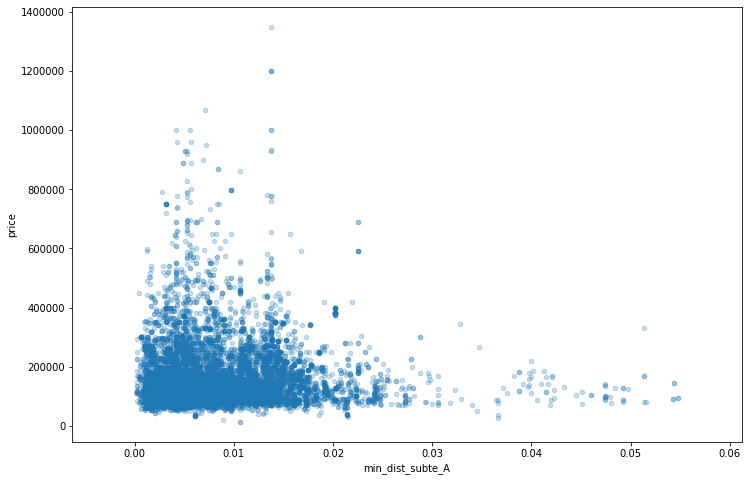

In [114]:
%matplotlib inline
propRecorridoA1 = finalRecorridoA[finalRecorridoA['price']< 1500000]
propRecorridoA2 = propRecorridoA1[propRecorridoA1['min_dist_subte_A']< 0.06]
propRecorridoA2.plot.scatter('min_dist_subte_A', 'price',alpha=0.25, figsize=(12,8))

In [115]:
#florida
florida_lon = estacionesB.loc[estacionesB.index[0],'X']
florida_lat = estacionesB.loc[estacionesB.index[0],'Y']
propRecorridoB['florida_lon'] = florida_lon
propRecorridoB['florida_lat'] = florida_lat

#C.Pellegrini
pellegrini_lon = estacionesB.loc[estacionesB.index[1],'X']
pellegrini_lat = estacionesB.loc[estacionesB.index[1],'Y']
propRecorridoB['pellegrini_lon'] = pellegrini_lon
propRecorridoB['pellegrini_lat'] = pellegrini_lat

#Uruguay
uruguay_lon = estacionesB.loc[estacionesB.index[2],'X']
uruguay_lat = estacionesB.loc[estacionesB.index[2],'Y']
propRecorridoB['uruguay_lon'] = uruguay_lon
propRecorridoB['uruguay_lat'] = uruguay_lat


#Callao
callao_lon = estacionesB.loc[estacionesB.index[3],'X']
callao_lat = estacionesB.loc[estacionesB.index[3],'Y']
propRecorridoB['callao_lon'] = callao_lon
propRecorridoB['callao_lat'] = callao_lat

#Pasteur
pasteur_lon = estacionesB.loc[estacionesB.index[4],'X']
pasteur_lat = estacionesB.loc[estacionesB.index[4],'Y']
propRecorridoB['pasteur_lon'] = pasteur_lon
propRecorridoB['pasteur_lat'] = pasteur_lat

#Pueyrredon
pueyrredon_lon = estacionesB.loc[estacionesB.index[5],'X']
pueyrredon_lat = estacionesB.loc[estacionesB.index[5],'Y']
propRecorridoB['pueyrredon_lon'] = pueyrredon_lon
propRecorridoB['pueyrredon_lat'] = pueyrredon_lat

#Carlos Gardel
carlosGardel_lon = estacionesB.loc[estacionesB.index[6],'X']
carlosGardel_lat = estacionesB.loc[estacionesB.index[6],'Y']
propRecorridoB['carlosGardel_lon'] = carlosGardel_lon
propRecorridoB['carlosGardel_lat'] = carlosGardel_lat

#Medrano
medrano_lon = estacionesB.loc[estacionesB.index[7],'X']
medrano_lat = estacionesB.loc[estacionesB.index[7],'Y']
propRecorridoB['medrano_lon'] = medrano_lon
propRecorridoB['medrano_lat'] = medrano_lat

#Angel Gallardo
gallardo_lon = estacionesB.loc[estacionesB.index[8],'X']
gallardo_lat = estacionesB.loc[estacionesB.index[8],'Y']
propRecorridoB['gallardo_lon'] = gallardo_lon
propRecorridoB['gallardo_lat'] = gallardo_lat

#Malabia
malabia_lon = estacionesB.loc[estacionesB.index[9],'X']
malabia_lat = estacionesB.loc[estacionesB.index[9],'Y']
propRecorridoB['malabia_lon'] = malabia_lon
propRecorridoB['malabia_lat'] = malabia_lat

#Dorrego
dorrego_lon = estacionesB.loc[estacionesB.index[10],'X']
dorrego_lat = estacionesB.loc[estacionesB.index[10],'Y']
propRecorridoB['dorrego_lon'] = dorrego_lon
propRecorridoB['dorrego_lat'] = dorrego_lat


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [116]:
#Florida
propRecorridoB['dist_florida'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['florida_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['florida_lat'])

#Pellegrini
propRecorridoB['dist_pellegrini'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pellegrini_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pellegrini_lat'])

#Uruguay
propRecorridoB['dist_uruguay'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['uruguay_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['uruguay_lat'])

#Callao
propRecorridoB['dist_callao'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['callao_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['callao_lat'])

#Pasteur
propRecorridoB['dist_pasteur'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pasteur_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pasteur_lat'])

#Pueyrredon
propRecorridoB['dist_pueyrredon'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pueyrredon_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pueyrredon_lat'])

#Carlos Gardel
propRecorridoB['dist_carlosGardel'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['carlosGardel_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['carlosGardel_lat'])

#Medrano
propRecorridoB['dist_medrano'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['medrano_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['medrano_lat'])

#Angel Gallardo
propRecorridoB['dist_gallardo'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['gallardo_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['gallardo_lat'])

#Malabia
propRecorridoB['dist_malabia'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['malabia_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['malabia_lat'])

#Dorrego
propRecorridoB['dist_dorrego'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['dorrego_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['dorrego_lat'])


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [117]:
propRecorridoB['min_dist_subte_B'] =propRecorridoB.loc[:,['dist_florida','dist_pellegrini','dist_uruguay','dist_callao',
                                                  'dist_pasteur','dist_pueyrredon','dist_carlosGardel','dist_medrano','dist_angelGallardo',
                                                 'dist_malabia','dist_dorrego']].min(axis=1)
propRecorridoB.head()


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Unnamed: 0.1,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,...,dist_uruguay,dist_callao,dist_pasteur,dist_pueyrredon,dist_carlosGardel,dist_medrano,dist_gallardo,dist_malabia,dist_dorrego,min_dist_subte_B
7,21,838,2019-07-18,9999-12-31,-34.589787,-58.449482,Chacarita,2.0,1.0,1.0,...,0.076492,0.071800,0.064864,0.058877,0.052012,0.041897,0.030583,0.018891,0.003840,0.003840
10,25,863,2019-07-18,9999-12-31,-34.601303,-58.439503,Villa Crespo,4.0,3.0,2.0,...,0.054997,0.050305,0.043369,0.037382,0.030517,0.020402,0.009088,0.002604,0.017655,0.002604
11,26,864,2019-07-18,2019-09-11,-34.604028,-58.455646,Villa Crespo,1.0,1.0,1.0,...,0.068415,0.063723,0.056786,0.050799,0.043934,0.035547,0.026238,0.020935,0.020383,0.020383
21,50,1478,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,...,0.046024,0.040679,0.033296,0.027433,0.021571,0.013286,0.004866,0.016559,0.031610,0.013286
71,216,3193,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,...,0.048616,0.043924,0.036988,0.031000,0.024136,0.014021,0.005179,0.010482,0.024036,0.010482


In [118]:
finalRecorridoB = propRecorridoB[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro', 'min_dist_subte_B']]
finalRecorridoB.sample(5)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_B
17545,2019-07-13,2019-08-02,-34.603551,-58.440522,Villa Crespo,1.0,0.0,1.0,25.0,25.0,53500.0,Departamento de 1 ambiente y medio en venta en...,Departamento de 1 ambiente y medio en venta. M...,Departamento,Venta,0.059345,0.005334
35947,2019-08-01,2019-08-13,-34.605373,-58.427608,Almagro,2.0,1.0,1.0,56.0,50.0,143000.0,Departamento de 2 ambientes en Venta en Almagr...,Excelente departamento de 2 ambientes con 56 m...,Departamento,Venta,0.048253,0.008854
30693,2019-07-05,2019-07-09,-34.593371,-58.442232,Villa Crespo,1.0,0.0,1.0,40.0,34.0,101500.0,Departamento de 1 ambiente en Venta en Villa c...,1 Amb Amplio y Luminoso Divisible de 40 m2...,Departamento,Venta,0.070284,0.006993
7864,2019-06-22,2019-06-23,-34.595692,-58.443551,Villa Crespo,2.0,1.0,1.0,42.0,40.0,112000.0,Departamento de 2 ambientes en Venta en Villa ...,"Excelente departamento 2 ambientes con balcon,...",Departamento,Venta,0.069282,0.007055
48448,2019-07-31,2019-08-14,-34.612034,-58.423177,Almagro,3.0,2.0,2.0,89.0,82.0,273565.0,3 AMBIENTES - EMPRENDIMIENTO RIVADAVIA PARK.,EXCELENTE 3 AMBIENTES EN EDIFICIO RIVADAVIA PA...,Departamento,Venta,0.050482,0.011083


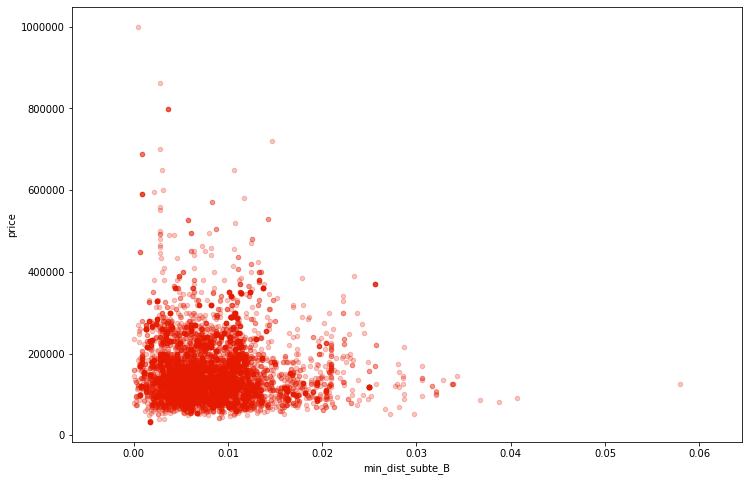

In [119]:
%matplotlib inline
propRecorridoB1 = finalRecorridoB[finalRecorridoB['price']< 1500000]
propRecorridoB2 = propRecorridoB1[propRecorridoB1['min_dist_subte_B']< 0.06]
propRecorridoB2.plot.scatter('min_dist_subte_B', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.1,0.0))

In [120]:
#AHORA LA LINEA C
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [122]:

for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoC['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [123]:
propRecorridoC['min_dist_subte_C'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)

finalRecorridoC = propRecorridoC[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_C']]
finalRecorridoC.sample(5)

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_C
27896,2019-05-22,2019-06-08,-34.595841,-58.379845,Retiro,5.0,3.0,3.0,133.0,133.0,370000.0,IMPECABLE DEPARTAMENTO EN VENTA EN RETIRO,Impecable departamento de 133 m2 sobre Suipach...,Departamento,Venta,0.009042,204.932184
23928,2019-03-01,9999-12-31,-34.615505,-58.391566,Monserrat,2.0,0.0,1.0,44.0,40.0,105000.0,VENTA DEPARTAMENTO 2 AMBIENTES BALCÓN BALVANERA,¡¡ DEPARTAMENTO DE 2 AMBIENTES CON BALCÓN AL F...,Departamento,Venta,0.022343,1067.517670
8435,2019-03-25,2019-06-08,-34.594347,-58.381062,Retiro,5.0,4.0,4.0,240.0,222.0,650000.0,DEPARTAMENTO EN VENTA,Xintel (MPA-MPA-924) Venta de Departamento 5 A...,Departamento,Venta,0.009319,307.232738
44977,2019-07-31,2019-08-14,-34.613087,-58.381360,Monserrat,2.0,1.0,1.0,34.0,34.0,90000.0,LUIS SAENZ PEÑA 300 DPTO 2 AMB - VENTA,Departamento de 2 ambientes en excelente estad...,Departamento,Venta,0.010305,98.757004
16607,2019-05-08,2019-07-06,-34.616768,-58.385984,Monserrat,1.0,0.0,1.0,40.0,37.0,88000.0,Apartment - Monserrat,Venta de Departamento Monoambiente a Estrenar....,Departamento,Venta,0.018024,552.901445


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


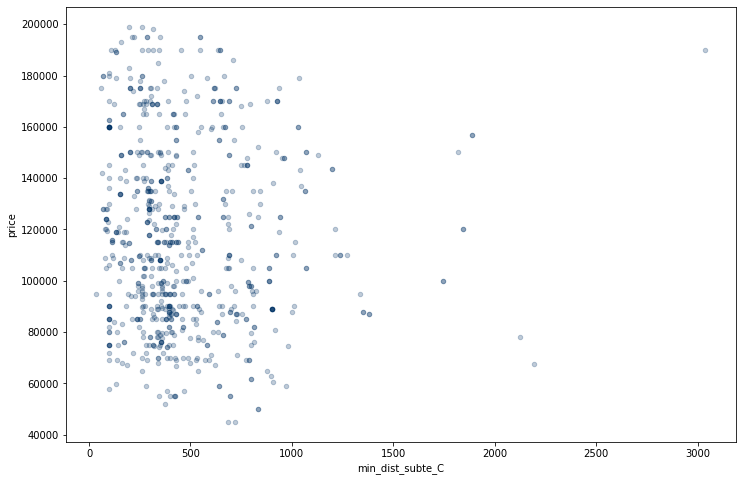

In [124]:
%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 200000]
propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist_subte_C']< 5000]
propRecorridoC1.plot.scatter('min_dist_subte_C', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.2,0.4))

In [125]:
#LINEA D
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [127]:
propRecorridoD['min_dist_subte_D'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
finalRecorridoD = propRecorridoD[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_D']]
finalRecorridoD.head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_D
1,2019-07-18,2019-07-25,-34.565168,-58.434490,Palermo,4.0,3.0,4.0,215.0,205.0,1420000.0,QUARTIER LIBERTADOR,Av. Del Libertador al 4800 - Quartier Libertad...,Departamento,Venta,0.090744,1076.776565
2,2019-07-18,2019-09-11,-34.594234,-58.421823,Palermo,3.0,2.0,2.0,94.0,80.0,379000.0,Se vende departamento 3 Ambientes C/ cochera e...,Nuevo y Excelente departamento 3 ambientes de ...,Departamento,Venta,0.049010,1143.797243
9,2019-07-18,2019-08-25,-34.591747,-58.409187,Barrio Norte,3.0,0.0,1.0,72.0,70.0,219000.0,Venta Departamento en Barrio Norte Capital Fed...,"Departamento en Venta, BARRIO NORTE;3AMBTES;FR...",Departamento,Venta,0.038862,185.951327
23,2019-07-18,9999-12-31,-34.580564,-58.431696,Palermo,2.0,0.0,1.0,50.0,50.0,175000.0,Guatemala 5574 - 2°04 Guatemala 5574- Dos ambi...,Guatemala 5574 <br>EN CONSTRUCCION <br>FECHA E...,Departamento,Venta,0.072554,597.575154
24,2019-07-18,9999-12-31,-34.596052,-58.427724,Palermo,2.0,0.0,1.0,43.0,43.0,143200.0,Departamento - Palermo,"Departamentos de 1, 2, 3, 4. Opcional 5 ambien...",Departamento,Venta,0.053095,1621.721345


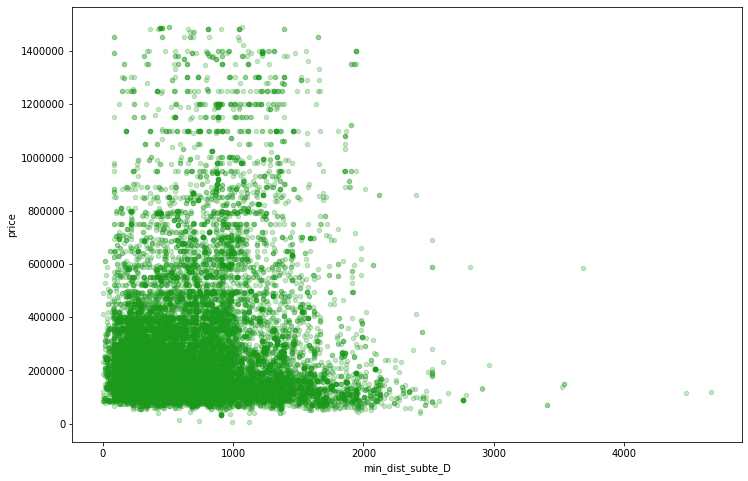

In [128]:
%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 1500000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist_subte_D']< 5000]
propRecorridoD2.plot.scatter('min_dist_subte_D', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))

In [129]:
#LINEA E
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [131]:
propRecorridoE['min_dist_subte_E'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
finalRecorridoE = propRecorridoE[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_E']]
finalRecorridoE.head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_E
196,2019-05-21,9999-12-31,-34.640587,-58.438446,Parque Chacabuco,2.0,1.0,1.0,38.0,38.0,75000.0,Venta Departamento en Parque Chacabuco Capital...,"Departamento en Venta, Departamento de 2 amb. ...",Departamento,Venta,0.094305,1115.050494
244,2019-05-21,2019-07-10,-34.610744,-58.372077,Monserrat,3.0,2.0,2.0,83.0,77.0,169000.0,DEPARTAMENTO EN VENTA,Xintel (LUO-LUO-24) Venta de Departamento 3 AM...,Departamento,Venta,0.017246,222.627703
274,2019-05-21,2019-06-18,-34.641745,-58.442858,Parque Chacabuco,3.0,2.0,1.0,52.0,52.0,63000.0,DEPARTAMENTO EN VENTA,Xintel (ZET-ZET-1313) Venta de Departamento 3 ...,Departamento,Venta,0.099875,903.304971
364,2019-04-20,2019-04-24,-34.637665,-58.429348,Parque Chacabuco,2.0,0.0,1.0,45.0,45.0,80000.0,Saraza 800 - U$D 80.000 - Departamento en Venta,COMODO 3 AMB CON COCINA SEPARADA BAÑO COMPLETO...,Departamento,Venta,0.082285,1148.306297
365,2019-04-20,2019-04-24,-34.640839,-58.431023,Parque Chacabuco,1.0,0.0,1.0,60.0,42.0,90000.0,J M Moreno 1900 - U$D 90.000 - Departamento ...,PH NUEVO PLANTA BAJA CON PATIO GRANDE MUY LUMI...,Departamento,Venta,0.087133,1448.776137


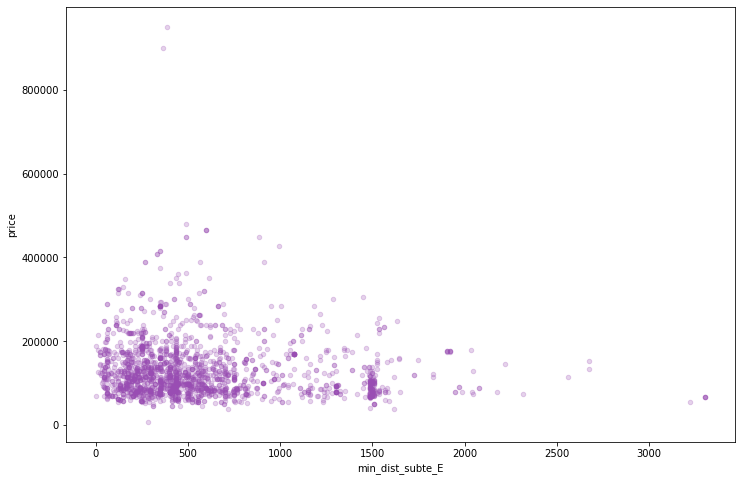

In [132]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist_subte_E']< 4000]
propRecorridoE2.plot.scatter('min_dist_subte_E', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))

In [133]:
#LINEA H
i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [134]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [135]:
propRecorridoH['min_dist_subte_H'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
finalRecorridoH = propRecorridoH[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_H']]
finalRecorridoH.head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_H
21,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,39.0,35.0,95500.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,Departamento,Venta,0.052685,2284.696044
44,2019-07-18,9999-12-31,-34.587622,-58.401619,Recoleta,1.0,0.0,1.0,29.0,29.0,95000.0,Aguero al 2100,ALQUILER- MONOAMBIENTE- APTO PROFESIONAL- REC...,Departamento,Venta,0.035419,403.607092
71,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,39.0,35.0,118000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al frent...,Departamento,Venta,0.053241,2356.663848
72,2019-05-21,2019-06-08,-34.600566,-58.426718,Almagro,1.0,0.0,1.0,23.0,23.0,69000.0,Departamento de 1 ambiente en Venta en Almagro...,"Lindo monoambiente en muy buen estado, con coc...",Departamento,Venta,0.047574,1995.384535
73,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,38.0,34.0,115000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al contr...,Departamento,Venta,0.053241,2356.663848


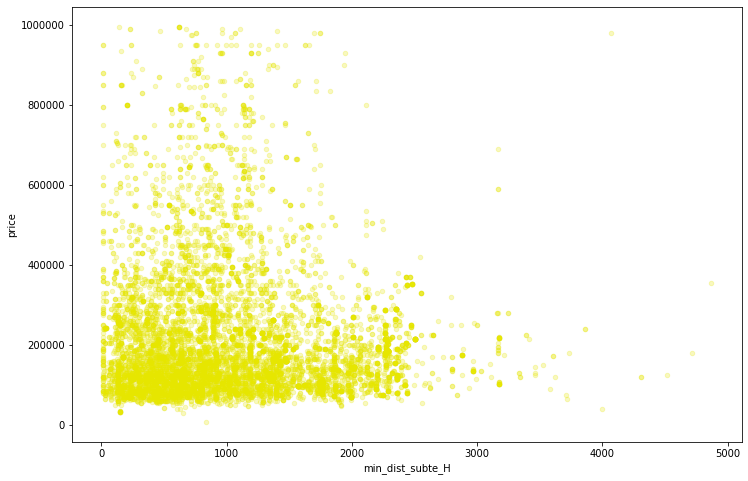

In [136]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist_subte_H']< 5000]
propRecorridoH2.plot.scatter('min_dist_subte_H', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))

In [137]:
final = pd.concat([finalRecorridoA, finalRecorridoB, finalRecorridoC, finalRecorridoD, finalRecorridoE, finalRecorridoH])
final.head(10)

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,barrio,bathrooms,bedrooms,description,dist_centro,end_date,lat,lon,min_dist_subte_A,min_dist_subte_B,...,min_dist_subte_E,min_dist_subte_H,operation_type,price,property_type,rooms,start_date,surface_covered,surface_total,title
3,Floresta,1.0,1.0,"Departamento en Venta, Departamento 2 ambiente...",0.128801,2019-07-31,-34.631462,-58.482067,0.013182,NaN,...,NaN,NaN,Venta,82000.0,Departamento,2.0,2019-07-18,35.0,35.0,Venta Departamento en Floresta Capital Federal...
4,Floresta,1.0,1.0,"Departamento en Venta, Departamento 2 ambiente...",0.127855,2019-07-31,-34.631199,-58.481384,0.012236,NaN,...,NaN,NaN,Venta,87000.0,Departamento,2.0,2019-07-18,37.0,37.0,Venta Departamento en Floresta Capital Federal...
5,Caballito,1.0,2.0,Departamento en venta de 3 Ambientes con excel...,0.075768,2019-09-11,-34.624594,-58.435902,0.006841,NaN,...,NaN,NaN,Venta,137000.0,Departamento,3.0,2019-07-18,65.0,55.0,Venta de Departamento 3 Ambientes en Caballito
6,Caballito,1.0,2.0,departamento de 3 ambientes de muy buena distr...,0.086839,2019-09-11,-34.619450,-58.452117,0.007549,NaN,...,NaN,NaN,Venta,218000.0,Departamento,3.0,2019-07-18,78.0,82.0,Departamento 3 amb impecable con cochera
21,Almagro,1.0,0.0,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,0.052685,2019-09-13,-34.606584,-58.430829,0.009950,NaN,...,NaN,NaN,Venta,95500.0,Departamento,1.0,2019-07-18,35.0,39.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...
47,Caballito,1.0,0.0,MUY BUEN DEPARTAMENTO DE 3 AMBIENTES CON DEPEN...,0.076519,9999-12-31,-34.619383,-58.441864,0.001709,NaN,...,NaN,NaN,Venta,180000.0,Departamento,3.0,2019-07-18,70.0,79.0,VENTA DEPARTAMENTO 3 AMBIENTES DEPENDENCIA BAL...
48,Caballito,1.0,0.0,Se vende excelente monoambiente ubicado en jos...,0.072823,2019-10-02,-34.622357,-58.435193,0.005313,NaN,...,NaN,NaN,Venta,78000.0,Departamento,1.0,2019-07-18,23.0,23.0,Departamento - Caballito
63,Flores,1.0,0.0,Ubicación: Fray Luis Beltrán entre Rivadavia y...,0.099968,2019-09-11,-34.626690,-58.458006,0.001320,NaN,...,NaN,NaN,Venta,92000.0,Departamento,1.0,2019-05-21,29.0,33.0,VENTA MONOAMBIENTE EXCELENTE UBICACIÓN
71,Almagro,1.0,0.0,Excelente departamento de un ambiente al frent...,0.053241,2019-06-08,-34.598219,-58.430038,0.017524,NaN,...,NaN,NaN,Venta,118000.0,Departamento,1.0,2019-05-21,35.0,39.0,Departamento de 1 ambiente en Venta en Almagro
72,Almagro,1.0,0.0,"Lindo monoambiente en muy buen estado, con coc...",0.047574,2019-06-08,-34.600566,-58.426718,0.016106,NaN,...,NaN,NaN,Venta,69000.0,Departamento,1.0,2019-05-21,23.0,23.0,Departamento de 1 ambiente en Venta en Almagro...


In [138]:
#Me quedo con la distancia minima de cada propiedad a cualquier subte (si esta cerca de 2, me quedo con el mas cercano)
final['min_dist_subte'] =final.loc[:,['min_dist_subte_A','min_dist_subte_B','min_dist_subte_C','min_dist_subte_D','min_dist_subte_E','min_dist_subte_H']].min(axis=1)
dmin = final[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte']]
dmin.head(20)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte
3,2019-07-18,2019-07-31,-34.631462,-58.482067,Floresta,2.0,1.0,1.0,35.0,35.0,82000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.128801,0.013182
4,2019-07-18,2019-07-31,-34.631199,-58.481384,Floresta,2.0,1.0,1.0,37.0,37.0,87000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.127855,0.012236
5,2019-07-18,2019-09-11,-34.624594,-58.435902,Caballito,3.0,2.0,1.0,55.0,65.0,137000.0,Venta de Departamento 3 Ambientes en Caballito,Departamento en venta de 3 Ambientes con excel...,Departamento,Venta,0.075768,0.006841
6,2019-07-18,2019-09-11,-34.619450,-58.452117,Caballito,3.0,2.0,1.0,82.0,78.0,218000.0,Departamento 3 amb impecable con cochera,departamento de 3 ambientes de muy buena distr...,Departamento,Venta,0.086839,0.007549
21,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,39.0,35.0,95500.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,Departamento,Venta,0.052685,0.009950
47,2019-07-18,9999-12-31,-34.619383,-58.441864,Caballito,3.0,0.0,1.0,79.0,70.0,180000.0,VENTA DEPARTAMENTO 3 AMBIENTES DEPENDENCIA BAL...,MUY BUEN DEPARTAMENTO DE 3 AMBIENTES CON DEPEN...,Departamento,Venta,0.076519,0.001709
48,2019-07-18,2019-10-02,-34.622357,-58.435193,Caballito,1.0,0.0,1.0,23.0,23.0,78000.0,Departamento - Caballito,Se vende excelente monoambiente ubicado en jos...,Departamento,Venta,0.072823,0.005313
63,2019-05-21,2019-09-11,-34.626690,-58.458006,Flores,1.0,0.0,1.0,33.0,29.0,92000.0,VENTA MONOAMBIENTE EXCELENTE UBICACIÓN,Ubicación: Fray Luis Beltrán entre Rivadavia y...,Departamento,Venta,0.099968,0.001320
71,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,39.0,35.0,118000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al frent...,Departamento,Venta,0.053241,0.017524
72,2019-05-21,2019-06-08,-34.600566,-58.426718,Almagro,1.0,0.0,1.0,23.0,23.0,69000.0,Departamento de 1 ambiente en Venta en Almagro...,"Lindo monoambiente en muy buen estado, con coc...",Departamento,Venta,0.047574,0.016106


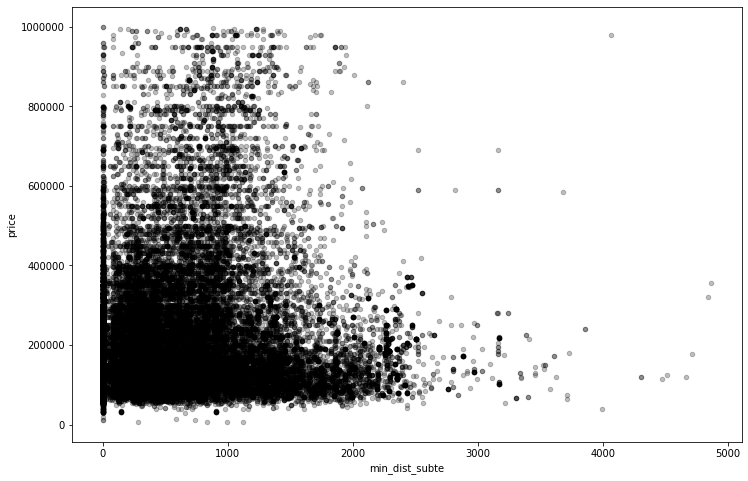

In [139]:
#Grafico la relacion precio vs distancia a CUALQUIER subte
%matplotlib inline
dmin1 = dmin[dmin['price']< 1000000]
dmin2 = dmin1[dmin1['min_dist_subte']< 5000]
dmin2.plot.scatter('min_dist_subte', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.0,0.0))

In [140]:
##df.to_csv(r'/home/santiago/Desktop/Academico/UBA/Introduccion a los Sistemas Inteligentes(75.50)/TP Final/TP/Git/TPSistemasInteligentes/datos con distancia a subtes.csv')
dmin.sample(20)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte
8056,2019-06-22,2019-06-23,-34.592555,-58.444097,Villa Crespo,3.0,2.0,1.0,51.0,48.0,105000.0,Departamento de 3 ambientes en Venta en Villa ...,3 AMB FRENTE CON LAVADERO INDEPENDIENTE - MUY ...,Departamento,Venta,0.072965,0.004312
38585,2019-07-14,2019-09-14,-34.596154,-58.436903,Villa Crespo,3.0,2.0,1.0,73.0,70.0,195000.0,DPTO 3 AMB C/ BALCON RECICLADO - VILLA CRESPO,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,0.062171,0.005682
18263,2019-03-17,2019-08-17,-34.614254,-58.419206,Almagro,4.0,3.0,1.0,85.0,74.0,239000.0,Venta Depto 4 amb. c/cochera fija/cub Almagro,Corredor Responsable: Mónica Silvia Martinuzzi...,Departamento,Venta,0.048732,0.005093
33443,2019-06-10,2019-06-23,-34.621674,-58.444462,Caballito,2.0,1.0,1.0,51.0,51.0,98000.0,F. García Lorca 87: Amplio Depto de 2amb. en P...,Gran departamento de 2 ambientes que consta de...,Departamento,Venta,0.081407,0.004553
6323,2019-03-07,2019-06-15,-34.591262,-58.406784,Recoleta,2.0,0.0,1.0,43.0,38.0,145000.0,Departamento - Recoleta,DEPARTAMENTO AL FRENTE EN EL BARRIO DE RECOLET...,Departamento,Venta,0.036944,542.804631
14372,2019-07-01,2019-09-02,-34.594294,-58.445205,Chacarita,1.0,0.0,1.0,27.0,24.0,73900.0,Venta Departamento Monoambiente En Villa Crespo,Oportunidad !!! Mono-ambiente súper luminoso ...,Departamento,Venta,0.072332,0.004945
23256,2019-04-26,2019-06-23,-34.608645,-58.419917,Almagro,2.0,1.0,1.0,38.0,35.0,99000.0,2 amb modernas bajas expensas,Departamento de 2 ambientes. Impecable!Departa...,Departamento,Venta,0.043834,1271.116713
8463,2019-03-05,2019-03-10,-34.610122,-58.405941,Balvanera,3.0,2.0,2.0,70.0,67.0,259000.0,ESPECTACULAR TORRE DEPTO 3 AMB 2 BAÑOS COMP...,En Torre Premiun de 24 Pisos Excelente depto...,Departamento,Venta,0.031335,0.006082
2070,2019-03-08,2019-04-03,-34.569456,-58.432881,Palermo,2.0,1.0,2.0,57.0,57.0,330000.0,Excelente 2 ambientes con cochera,"Excelente 2 ambientes con cochera, muy luminos...",Departamento,Venta,0.084847,665.793068
2846,2019-06-17,9999-12-31,-34.611165,-58.372795,Monserrat,2.0,1.0,1.0,35.0,35.0,96000.0,Venta! Impecable Depto 2 Amb Montserrat,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,Venta,0.016948,228.810104


In [141]:
dmin.to_csv('dataFiltrada/dataV3.csv')
